In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv")


In [220]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


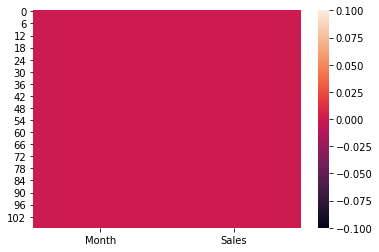

In [221]:
sns.heatmap(df.isnull())

In [0]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)

In [223]:
df.tail()

,Sales
Month,
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342
1968-11-01,17180
1968-12-01,14577


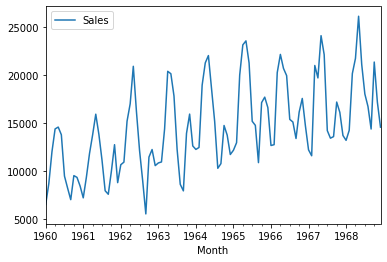

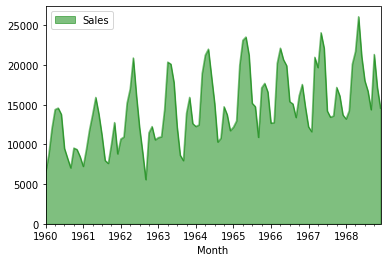

In [224]:
df.plot()
df.plot(kind='area',color='g',alpha=0.5)

In [225]:
#testing for Sationarity
from statsmodels.tsa.stattools import adfuller
def test(sales):
   # for p value  adfuller gives ada TEST Statistic , p-value,lag used, Nume of observation
  if adfuller(sales)[1]<0.005:
    print("Stationary")
  else:
    print("Non Stationary")
test(df['Sales'])

Non Stationary


In [0]:
df['Sales First Diff']= df['Sales']-df['Sales'].shift(1)

In [227]:
df.head()

,Sales,Sales First Diff
Month,,
1960-01-01,6550,NaN
1960-02-01,8728,2178.0
1960-03-01,12026,3298.0
1960-04-01,14395,2369.0
1960-05-01,14587,192.0


In [0]:
df['Seasonal First Diff']=df['Sales']-df['Sales'].shift(12)

In [229]:
df.head()

,Sales,Sales First Diff,Seasonal First Diff
Month,,,
1960-01-01,6550,NaN,NaN
1960-02-01,8728,2178.0,NaN
1960-03-01,12026,3298.0,NaN
1960-04-01,14395,2369.0,NaN
1960-05-01,14587,192.0,NaN


In [230]:
test(df['Seasonal First Diff'].dropna())

Stationary


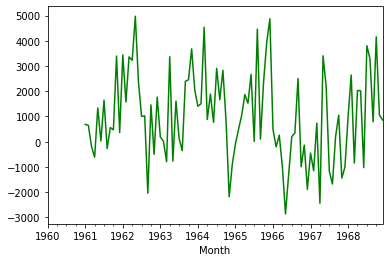

In [231]:
df['Seasonal First Diff'].plot(color='g')

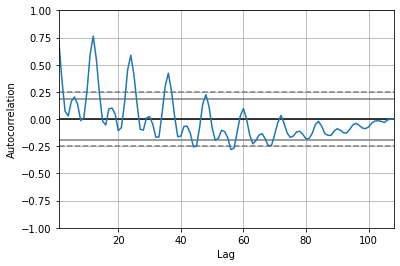

In [232]:
from pandas.plotting import  autocorrelation_plot
autocorrelation_plot(df['Sales'])

In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

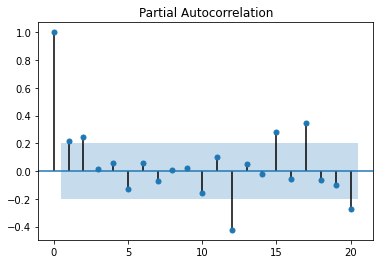

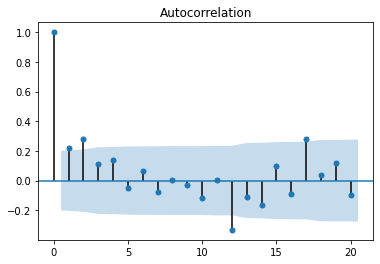

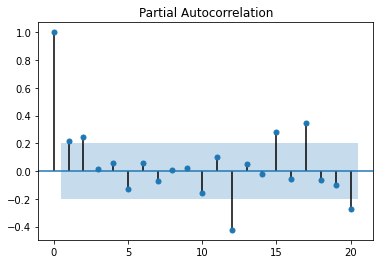

In [234]:

plot_acf(df['Seasonal First Diff'].iloc[13:].dropna())
plot_pacf(df['Seasonal First Diff'].iloc[13:].dropna())

In [0]:
#P AR model lags d = differncing q - MA lags Here p =1 and q = 1 based on expoinetail decreased is 1 d =1

In [236]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Sales'],order=(1,1,0))
model_fit= model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [237]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  107
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1017.799
Method:                       css-mle   S.D. of innovations           3271.772
Date:                Tue, 05 May 2020   AIC                           2041.598
Time:                        07:17:20   BIC                           2049.617
Sample:                    02-01-1960   HQIC                          2044.849
                         - 12-01-1968                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            73.6102    374.165      0.197      0.844    -659.740     806.960
ar.L1.D.Sales     0.1561      0.095      1.635      0.105      -0.031       0.343
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.4052           +0.0000j            6.4052            0.0000
-----------------------------------------------------------------------------
"""

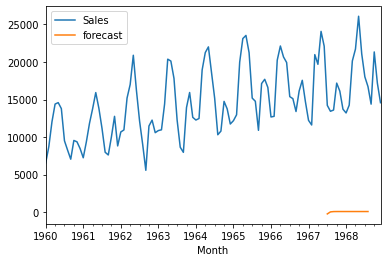

In [238]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot()

In [0]:
import statsmodels.api as sm

In [240]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,0),seasonal_order=(1,1,0,12)) # seasonal order found in pacf 12 is shift for seasonal
result = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [273]:
df['forecast']= result.predict(start=90,end=108,dynamic=True)
pred = result.forecast(steps=100)
pred.index
pred.values

array([13440.86282326, 13922.59879806, 20968.4620067 , 21600.97688655,
       25981.12627948, 21972.32148915, 17315.91264969, 16184.2247321 ,
       14673.36297434, 20517.88506524, 17377.84640507, 14839.90962621,
       13912.90053429, 14579.36021325, 21242.78161755, 22190.23250783,
       26568.35088856, 22227.19958934, 18098.08488645, 16910.14284578,
       15126.40749453, 21338.3812223 , 17860.78856166, 15301.36138929,
       14305.27725621, 14910.72266457, 21700.46466102, 22543.89213423,
       26922.68135864, 22691.30416702, 18388.02412242, 17218.66282804,
       15525.05767046, 21615.66206097, 18249.56354328, 15697.23465149,
       14723.96601608, 15349.56444825, 22097.58273194, 22975.36915724,
       27353.93680188, 23086.30120411, 18840.54800108, 17665.04948308,
       15941.67430742, 22072.36701038, 18669.44195857, 16114.76850352,
       15133.96390541, 15752.90579043, 22514.70542344, 23381.14308111,
       27759.78391358, 23504.12447344, 19239.370145  , 18065.89875299,
      

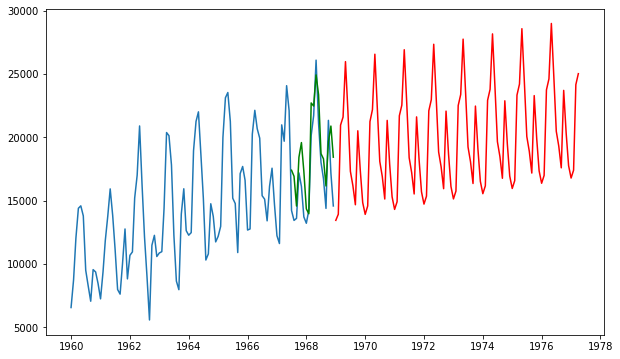

In [274]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.plot(df.index,df['Sales'])
plt.plot(df.index,df['forecast'],c='g')
plt.plot(pred.index,pred.values,color='r')
plt.show()

In [249]:
df

,Sales,Sales First Diff,Seasonal First Diff,forecast
Month,,,,
1960-01-01,6550,NaN,NaN,NaN
1960-02-01,8728,2178.0,NaN,NaN
1960-03-01,12026,3298.0,NaN,NaN
1960-04-01,14395,2369.0,NaN,NaN
1960-05-01,14587,192.0,NaN,NaN
...,...,...,...,...
1968-08-01,16722,-1302.0,3288.0,18298.784571
1968-09-01,14385,-2337.0,787.0,16157.935555
1968-10-01,21342,6957.0,4155.0,19643.436157
